<a href="https://colab.research.google.com/github/Jeihyuck/All-weather/blob/main/backtest_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text(0, 0.5, 'monthly Class of Investment Clock [class 1,2,3,4]')

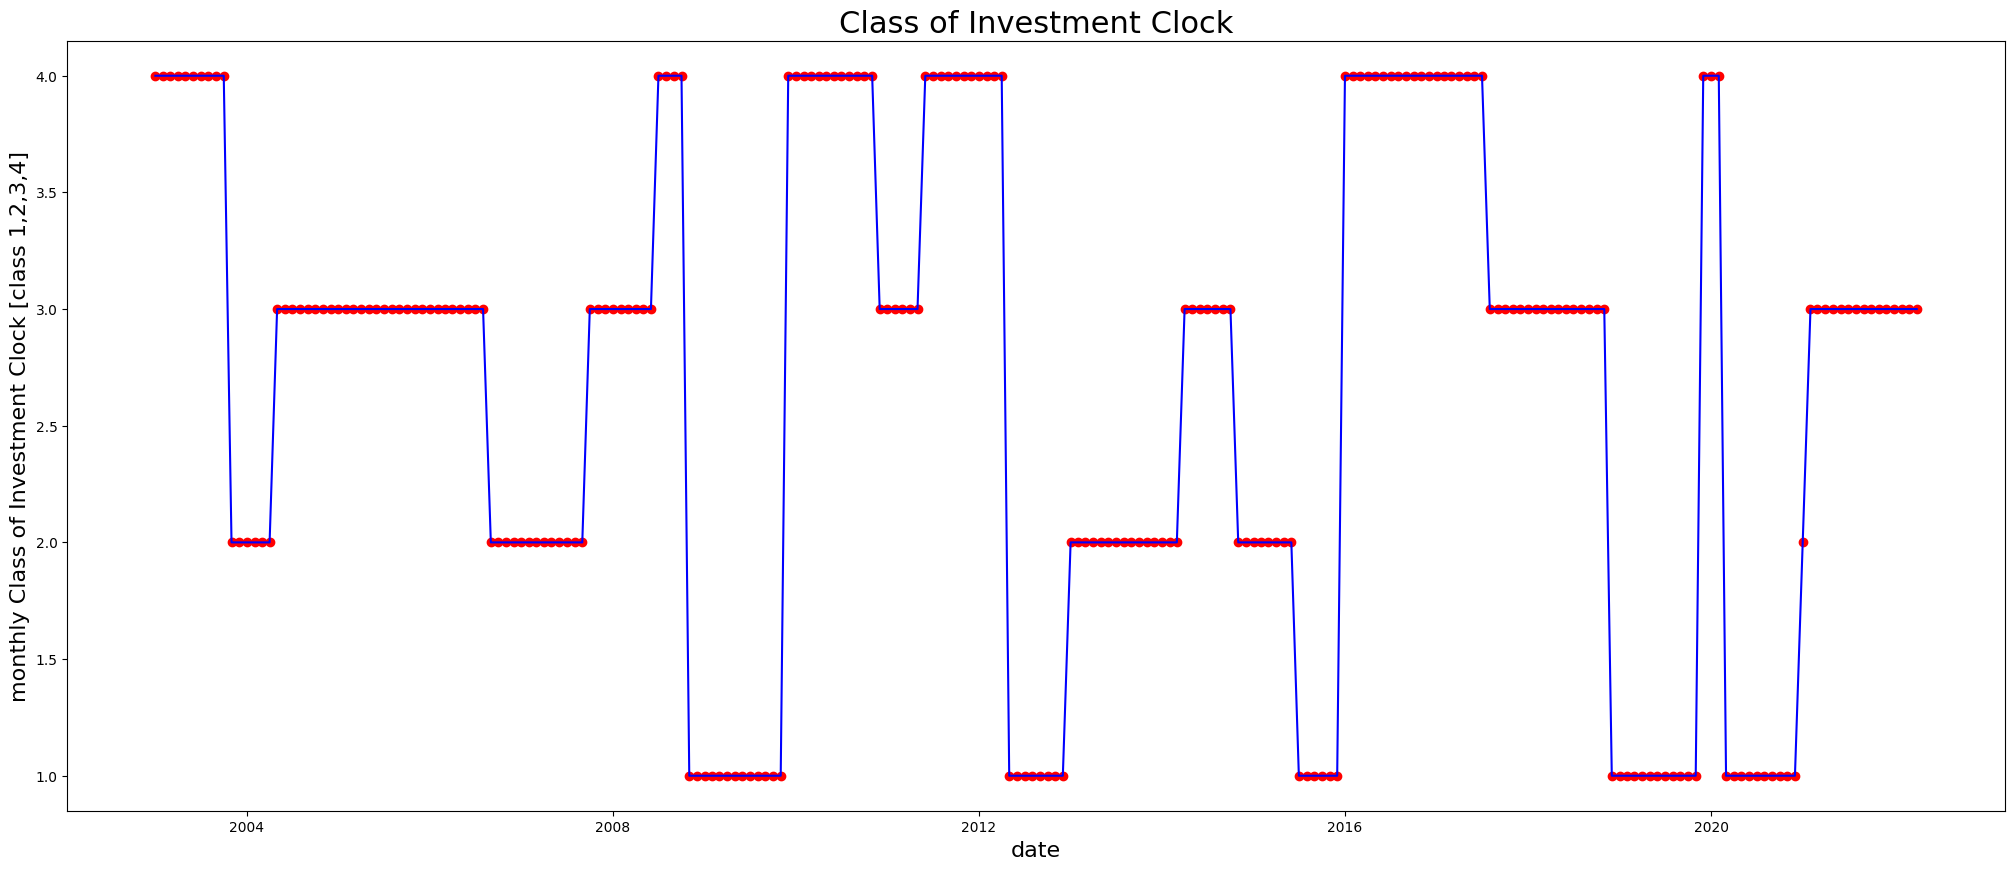

In [ ]:
# import
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xlrd

# CLI
start_date = datetime.datetime(2001, 1, 1)
end_date = datetime.datetime(2022, 4, 1)

# df = web.DataReader("CLI","oecd",start_date,end_date)
df = web.DataReader("USALOLITONOSTSAM","fred",start_date,end_date)

# do not use (different dataset)
# df_cpi = web.DataReader("MEDCPIM159SFRBCLE","fred",start_date,end_date)

# use hard coded data (from 2001-01-01)
# https://www.calculator.net/inflation-calculator.html
df_cpi = pd.DataFrame([
    3.73,3.53,2.92,3.27,3.62,3.25,2.72,2.72,2.65,2.13,1.90,1.55,
    1.14,1.14,1.48,1.64,1.18,1.07,1.46,1.80,1.51,2.03,2.20,2.38,
    2.60,2.98,3.02,2.22,2.06,2.11,2.11,2.16,2.32,2.04,1.77,1.88,
    1.93,1.69,1.74,2.29,3.05,3.27,2.99,2.65,2.54,3.19,3.52,3.26,
    2.97,3.01,3.15,3.51,2.80,2.53,3.17,3.64,4.69,4.35,3.46,3.42,
    3.99,3.60,3.36,3.55,4.17,4.32,4.15,3.82,2.06,1.31,1.97,2.54,
    2.08,2.42,2.78,2.57,2.69,2.69,2.36,1.97,2.76,3.54,4.31,4.08,
    4.28,4.03,3.98,3.94,4.18,5.02,5.60,5.37,4.94,3.66,1.07,0.09,
    0.03,0.24,-0.38,-0.74,-1.28,-1.43,-2.10,-1.48,-1.29,-0.18,1.84,2.72,
    2.63,2.14,2.31,2.24,2.02,1.05,1.24,1.15,1.14,1.17,1.14,1.50,
    1.63,2.11,2.68,3.16,3.57,3.56,3.63,3.77,3.87,3.53,3.39,2.96,
    2.93,2.87,2.65,2.30,1.70,1.66,1.41,1.69,1.99,2.16,1.76,1.74,
    1.59,1.98,1.47,1.06,1.36,1.75,1.96,1.52,1.18,0.96,1.24,1.50,
    1.58,1.13,1.51,1.95,2.13,2.07,1.99,1.70,1.66,1.66,1.32,0.76,
    -0.09,-0.03,-0.07,-0.20,-0.04,0.12,0.17,0.20,-0.04,0.17,0.50,0.73,
    1.37,1.02,0.85,1.13,1.02,1.01,0.84,1.06,1.46,1.64,1.69,2.07,
    2.50,2.74,2.38,2.20,1.87,1.63,1.73,1.94,2.23,2.04,2.20,2.11,
    2.07,2.21,2.36,2.46,2.80,2.87,2.95,2.70,2.28,2.52,2.18,1.91,
    1.55,1.52,1.86,2.00,1.79,1.65,1.81,1.75,1.71,1.76,2.05,2.29,
    2.49,2.33,1.54,0.33,0.12,0.65,0.99,1.31,1.37,1.18,1.17,1.36,
    1.40,1.68,2.62,4.16,4.99,5.39,5.37,5.25,5.39,6.22,6.81,7.04,
    7.53,7.91,8.56,8.22,8.52
])

df_cpi.index = df_cpi.index.map(lambda x: datetime.datetime(2001 + x//12, 1+x%12, 1))

# df['CPIyy(m-1)'] = df['CPIyy'].shift(1)
# df['CPIyy2m'] = (df['CPIyy']+df['CPIyy(m-1)'])/2

df['CPIyy'] = df_cpi
df['CPIyy2m'] = df_cpi.rolling(window=2, min_periods=1).mean()
df['CPIyy2y'] = df_cpi.rolling(window=24, min_periods=1).mean()
df['CPIyy2m-2y'] = df['CPIyy2m'] - df['CPIyy2y']

dfnn = pd.DataFrame()
dfnn['CPIyy2m-2y'] = df["CPIyy2m-2y"]
dfnn['CLI-100'] = df[('USALOLITONOSTSAM')]-100

dfnn['class1'] = (dfnn['CPIyy2m-2y'] < 0) & (dfnn['CLI-100'] < 0) #저물가 저성장, 경기침체
dfnn['class2'] = (dfnn['CPIyy2m-2y'] < 0) & (dfnn['CLI-100'] > 0) #저물가 고성장, 정기회복
dfnn['class3'] = (dfnn['CPIyy2m-2y'] > 0) & (dfnn['CLI-100'] > 0) #고물가 고성장, 경기과열
dfnn['class4'] = (dfnn['CPIyy2m-2y'] > 0) & (dfnn['CLI-100'] < 0) #고물가 저성장, 스테그플레이션

dfnn.loc[dfnn['class1']>0, "class"] = 1
dfnn.loc[dfnn['class2']>0, "class"] = 2
dfnn.loc[dfnn['class3']>0, "class"] = 3
dfnn.loc[dfnn['class4']>0, "class"] = 4
dfnn = dfnn[24:]

# Investment Clock Bar Plot

plt.figure(figsize=(25,10))
plt.plot(np.array(dfnn.index),np.array(dfnn['class']),'ro')
plt.plot(np.array(dfnn.index),np.array(dfnn['class']),color='blue')
plt.title("Class of Investment Clock",size=22)
plt.xlabel("date",size=16)
plt.ylabel("monthly Class of Investment Clock [class 1,2,3,4]",size=16)

In [ ]:
def calc_mdd(e):
    running_max, running_min = 0, 0
    max_idx, min_idx = 0, 0
    mdd = 0
    mdd_start, mdd_end = 0, 0
    for i, v in enumerate(e):
        if v > running_max:
            running_max = v
            running_min = v
            max_idx, min_idx = i, i
        if  v < running_min:
            running_min = v
            min_idx = i
        dd = (running_max-running_min)*100/running_max
        if dd > mdd:
            mdd = dd
            mdd_start = max_idx
            mdd_end = min_idx
    # print(mdd, mdd_start, mdd_end)
    return mdd

# def calc_cagr(e, d=252):
#     # d: trading days per year

def calc_cagr(s, e, p, d=252):
    return ((e/s)**(1/(p/d))-1)*100

def calc_cagr_df(f, d=252):
    return calc_cagr(f[0], f[-1], len(f)-1, d)


def get_equal_portfolio_ratio(p):
    return (1/p)/(1/p).sum()

def get_equal_portfolio_count(p, net):
    assert isinstance(p, np.ndarray)
    assert len(p.shape) == 1
    return net/(len(p)*p)


def get_weighted_portfolio_count(p, w, net):
    assert isinstance(p, np.ndarray)
    assert w.sum() > 0.999 and w.sum() < 1.001
    assert len(p.shape) == 1
    return (net/p)*w

In [ ]:
# download price data
!pip install yfinance
import pandas_datareader.data as web
import yfinance as yf
yf.pdr_override()
stock_start = "2007-01-01"
stock_end = "2022-08-01"
data = web.get_data_yahoo(["AGG", "DBC", "QQQ"], start=stock_start, end=stock_end)
data.reindex(columns=["AGG", "DBC", "QQQ"])
indexes = data.Close.index[1:]
prices = data.Close[1:]
# assert len(prices[prices.isna().any(axis=1)]) == 0

yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


[*********************100%%**********************]  3 of 3 completed


In [ ]:
#allocation_matrix = np.array([[9.6, 0.1, 7.7], [4.9, 0.1, 16.0], [4.4, 22.2, 7.5], [7.3, 4.5, 5.5]])
#allocation_matrix = allocation_matrix/allocation_matrix.sum(axis=1,keepdims=True)
#allocation_matrix = np.array([[0.1, 0.0, 0.9], [0.05, 0.0, 0.95], [0.0, 0.7, 0.3], [0.9, 0.0, 0.1]])
allocation_matrix = np.array([[0.7, 0.0, 0.3], [0.05, 0.0, 0.95], [0.0, 0.8, 0.2], [0.9, 0.0, 0.1]])

In [ ]:
diff = dfnn['class'][1:].reset_index(drop=True) != dfnn['class'][:-1].reset_index(drop=True)
diff.index = dfnn.index[1:]
np.set_printoptions(precision=2)

transition = diff[diff==True]
seasons = dfnn.loc[transition.index]['class']

with_season = prices.iloc[prices.index.get_indexer(seasons.index, method='nearest')].reset_index(drop=True)
with_season['class'] = seasons.reset_index(drop=True)
with_season.index = seasons.index
earn = with_season[1:].reset_index(drop=True)/with_season[:-1].reset_index(drop=True)
earn.index = with_season.index[:-1]
earn['class'] = with_season['class']

rebalancing at 2003-11-01 00:00:00: [ 500.    0. 9500.]
total: 10000, season: 2.0

rebalancing at 2004-05-01 00:00:00: [   0. 8000. 2000.]
total: 10000, season: 3.0

rebalancing at 2006-09-01 00:00:00: [ 500.    0. 9500.]
total: 10000, season: 2.0

rebalancing at 2007-10-01 00:00:00: [   0.   9366.19 2341.55]
total: 11708, season: 3.0

rebalancing at 2008-07-01 00:00:00: [15664.43     0.    1740.49]
total: 17405, season: 4.0

rebalancing at 2008-11-01 00:00:00: [11431.67     0.    4899.29]
total: 16331, season: 1.0

rebalancing at 2009-12-01 00:00:00: [17181.48     0.    1909.05]
total: 19091, season: 4.0

rebalancing at 2010-12-01 00:00:00: [    0.   15726.85  3931.71]
total: 19659, season: 3.0

rebalancing at 2011-06-01 00:00:00: [20178.66     0.    2242.07]
total: 22421, season: 4.0

rebalancing at 2012-05-01 00:00:00: [16320.41     0.    6994.46]
total: 23315, season: 1.0

rebalancing at 2013-01-01 00:00:00: [ 1172.05     0.   22269.04]
total: 23441, season: 2.0

rebalancing at 201

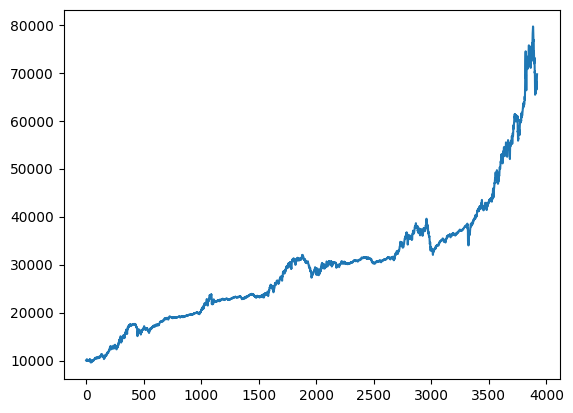

In [ ]:
cur_season = dfnn.iloc[dfnn.index.get_indexer([prices.index[0]], method='nearest')[0]]['class']
portfolio = get_weighted_portfolio_count(prices.iloc[0].to_numpy(), allocation_matrix[int(cur_season)-1], 10000)

portfolio_price = prices*portfolio

for date,v in transition.items():
    cur_season = seasons.loc[date]
    date_loc = prices.index.get_indexer([date], method='nearest')[0]
    price = prices.iloc[date_loc].to_numpy()
    net_price = (portfolio * price).sum()

    # rebalancing
    weight = allocation_matrix[int(cur_season)-1]
    portfolio = get_weighted_portfolio_count(price, weight, net_price)
    print(f'rebalancing at {date}: {price * portfolio:}')
    print(f'total: {net_price:.0f}, season: {cur_season}\n')

    # naive implementation
    portfolio_price[date_loc:] = prices[date_loc:]*portfolio


price = prices.iloc[-1].to_numpy()
net_price = (portfolio * price).sum()
print(f'total: {net_price}')
total_result = portfolio_price.sum(axis=1).to_numpy()
print(portfolio_price)


print ("Total Result =\n", total_result)
plt.plot(total_result)
print(f'CAGR:{calc_cagr_df(total_result):.2f}, MDD:{calc_mdd(total_result):.2f}')